# Principios de estadìstica actuarial vida

### Introducciòn
Al definir la **ciencia actuarial**, nos referimos a esa disciplina en la que los riesgos asumidos por las entidades financieras y de seguros se evalúan mediante la aplicación de técnicas estadísticas y matemáticas. Por ende, en esta materia, el objetivo principal hace referencìa a la evaluación de riesgos financieros especialmente en la industria de seguros utilizando herramientas cuantitativas oportunamente confiables.
Por supuesto, hay muchos campos en los que este tema ha evolucionado a lo largo de los años. Por ejemplo: "Problemas de accidentes, Pensiones, Reaseguros y muchos otros". Hoy en día, a decir la verdad, desde los albores de la **Revolución Industrial** hemos sido testigos de una tendencia al alza en la **Esperanza de vida** en todo el mundo. <br>Además, el progreso cientìfico ha traído una gran cantidad de beneficios en el estilo de vida de la humanidad. <br>De hecho, ha habido una tendencia secular a trabajar menos y aumentar la productividad, aumentando el ocio. Es por esta razón que las diversas jurisdicciones también pudieron adoptar políticas de jubilación gracias a **estudios demográficos** detallados. A medida que algunas poblaciones europeas luchan con el envejecimiento y una brecha negativa en los nacimientos, otros continentes como África enfrentan tasas altas, pero como resultado de otros factores, su esperanza de vida está bastante lejos de la occidental. <br>
Hasta cierto punto, características como la escolarización o el PIB son relevantes en la que *Spock* hubiera dicho **"larga vida y prosperidad"**. <br>
En este breve cuaderno de Jupyter vamos a introducir algunos conceptos básicos de estadísticas actuariales vida con la esperanza de hacer las ideas claras a través de Python.<br>
Uno de los modelos que basicos hace referencia al modelo biometrico, suportado por las tablas de vida, o *Actuarial Tables*

### Modelo Biometrico

El modelo biométrico básico es un modelo estocástico definido alrededor de una variable aleatoria $ X $ que llamamos la **edad de muerte** del individuo. <br> Por lo tanto, $ X $ es una variable definida en el conjunto de **números reales positivos**, aunque en las construcciones prácticas acepta la existencia de una edad limite o infinito actuarial  que se denota como 
$\omega$. La información que se refiere a la edad de la muerte en los estudios censales o muestras de poblaciones específicas se refiere a los años completos que ha vivido el fallecido, por lo que sería mucho más razonable tratar $ X $ como una variable discreta. <br> Ambos enfoques de todas maneras son conciliables y solo conducen a ligeras divergencias. <br>

**Hipotesis básica del modelo biométrico** <br>

**1.Homogenidad:** los individuos forman un grupo homogéneo, es decir, el comportamiento estadístico de su edad de muerte es idéntico. <br>
**2.Independencia:**: Las variables que describen las edades de muerte de los diferentes individuos son estadísticamente independientes. <br>
**3. Estacionariedad:**: las propiedades biométricas de los individuos no dependen de su fecha de nacimiento, sino solo de su edad. <br>Esta hipótesis es aceptada en la práctica por cortos períodos de tiempo.

Antes de continuar, recordemos algunas nociones **útiles**: <br>
* $ X = $ La edad de muerte de la persona inducida <br>
* $ x = $ Edad actual de la persona <br>
* $ T (x) $ o $ X $ - $ x = $ Vida residual a la edad $ x $. Toma valores en el intervalo (0, $\omega$ - $x$) <br>
* $ F (x) $ o $ P (X \le x) = $ Función de distribución de la edad de la muerte <br>
<a id='bi'></a>
* $ S (x) = P (X> x) = 1 - F (x) = $ Función de supervivencia (por ejemplo, sobrevivo a $ x $ edad) <br>
* $ G_ {x} (t) = P (T (x) \le t) = P (X - x \le | X> x) = P (X \le x + t | X> x) $ = Distribución función de la edad residual 
<br>

* $ _h {q} _x = P (x <X \le x + h | X> x) = \frac {F (x + h) - F (x)} {1 - F (x)} $ = Temporal **probabilidad de muerte** para un individuo de edad $ x $. <br>En otras palabras, es la probabilidad de que una persona que ha excedido la edad $ x $ muera entre $ x $ y $ x + h $, por lo tanto, es una probabilidad de muerte condicionada por exceder una edad x. <br>
<br>
* $ _h {p} _x = 1- _h {q} _x = \frac {1-F (x + h)} {1-F (x)} $ = Temporal **probabilidad de supervivencia** para un individuo de edad $ x $. Es la probabilidad de que un individuo que haya pasado la edad $ x $ exceda la edad $ x + h $. Obviamente, es la probabilidad del evento opuesto, es decir, uno menos la probabilidad de muerte.

## Tasa instantanea de fallecimiento

Al definir **tasa de mortalidad instantánea** denotar como $ \mu_ {x} $ o $\mu (x) $ aludimos a la medida de la fuerza o la intensidad de la mortalidad a la edad $ x $, para las personas que han alcanzado ese años. <br>Ese es un límite, como se muestra: <br>
$$\mu (x) = \lim _ {\Delta {t \to 0}} \frac {\Delta {_t} q_ {x}} {\Delta {t}} $$ <br>

En otras palabras, esa tasa recoge el valor límite de la probabilidad temporal de muerte fraccionada dentro del año. <br>

$$\Delta{_t}q_{x} = P(X \le x + \Delta{_t} | X > x) = \frac{F(x+\Delta{_t}) -F(x)}{1-F(x)}$$<br>
Por lo tanto:

$$\frac{\Delta{_t}q_{x}}{\Delta{t}}= \frac{1}{1-F(x)}\times\frac{F(x+\Delta{t})-F(x)}{1-F(x)}$$<br>
Tomando límites tenemos la siguiente igualdad donde $f$ es la función de densidad de $X$.

$$\mu (x) =  \frac{f(x)}{1-F(x)}$$

## Tablas de vida

*Las tablas de vida* recogen las funciones biometricas que describen la evoluciòn de una cohorte desde su *nacimiento* hasta su *extinciòn* (o muerte de todos sus miembros), y se utilizan en estadìstica actuarial para determinar las probabilidades de fallecimiento y cualquier otra magnitud necesaria. <br>La **cohorte** es una funciòn:
### $$ l: [0, \omega] \to \mathbb {R} $$

<a id='dx'> </a>
Sus valores están designados por $ l (x) $, donde $ l (0) $ es el tamaño inicial del grupo o cohorte y $ l (x) $ es el número de sobrevivientes de $ l (0) $ que alcanzar exactamente la edad $ x $. También tenemos que $ l (\omega) = 0 $ y que $ l (x) = l (0) \times S (x) $. Por conveniencia, usualmente se supone que $ l (0) $ es 100,000. <br>
En las tablas de vida, también tenemos que $_{n}d_{x}$ representa el **número de muertes** entre las edades $ x $ y $x + n$:<br>
De hecho, tenemos que: <br>
### $$ _ {n} d_ {x} = l (x) - l (x + n) $$
$ NOTA: $ <br>
En las tablas de vida, $ l (x) $ es la función principal de la que derivan todos los demás.

En particular la Tabla de Mortalidad, considerada como la descripciòn del comportamiento de una Poblaciòn Hipotética, compuesta por elemntos de la misma edad, hasta la extinciòn total del grupo, es uno de los instrumentos de que el $Actuario$ hace uso para obtener valores de benficios futuros que estàn sujetos a la supervivencia o a la muerte de las personas.<br> 
Cabe decir que, el grado de confiabilidad de los càlculos obtenidos depnderà, entre otras cosas, de la veracidad con que l aTabla utilizada represente a la Poblaciòn Real, ya que al emplearse esta herramienta se està haciendo la suposiciòn de que la Poblaciòn Real tiene al mismo comportamiento que el de l Poblaciòn Hipotética contenida en la Tabla. En fin, hay que recordad que la construcciòn, a grandes rasgos, esté basada en un nùmero muy grande de hechos estadìsticos y, posteriormente, en la *graduaciòn* de tales obsevaciones. Sin embargo, este Notebook no tiene por objeto el explicar ni analizar los métodos que se usan para su construcciòn, desde la observaciòn de los hechos, una Tabla de Mortalidad. Nos enfocaremos mas bien en la familiarizaciòn en el manejo de los conceptos y la notaciòn que en ella se utilizan.

### Asì lucirìa dicha tabla

| EDAD | NUMERO DE SOBREVIVIENTE EN CADA EDAD | NUMERO DE MUERTES EN CADA EDAD (CONS.) | PROB. DE MORIR ANTES DE CUMPLIR LA SIGUIENTE EDAD | PROB DE SOBREVIVIR A LA SIGUIENTE EDAD |
|------|----------------------------------------|----------------------------------------|---------------------------------------------------|----------------------------------------|
| $x$    | $l(x)$                                   |$d(x)$                                   | $q(x)$                                              | $p(x)$                                   |

Yendo directamente al grano implementamos en Python una vista prelimiar de ella.

In [5]:
#First of all, we import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
sns.set_style('darkgrid')

In [2]:
file = r'C:\Users\Josè Valencia\Desktop\Actuarial\lifeTable.csv'
dataset = pd.read_csv(file) 
dataset.head() # Our dataset looks like this

,age,Australia_Male,Austria_Male,Belgium_Male,Bulgaria_Male,Canada_Male,Czech Republic_Male,Denmark_Male,Estonia_Male,Finland_Male,...,Netherlands_Female,Poland_Female,Portugal_Female,Russia_Female,Slovakia_Female,Slovenia_Female,Spain_Female,Sweden_Female,United Kingdom_Female,United States_Female
0,0,100000,100000,100000,100000,100000,100000,100000,100000,100000,...,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
1,1,99528,99600,99620,98938,99488,99698,99689,99582,99740,...,99649,99493,99693,99279,99526,99747,99713,99759,99583,99415
2,2,99495,99572,99570,98887,99453,99674,99663,99521,99723,...,99624,99461,99657,99205,99486,99727,99682,99735,99558,99376
3,3,99471,99545,99549,98854,99433,99646,99657,99521,99717,...,99609,99443,99639,99160,99444,99717,99669,99718,99538,99351
4,4,99458,99528,99528,98795,99421,99637,99654,99521,99707,...,99595,99424,99626,99130,99414,99706,99657,99700,99522,99332


El conjunto de datos se descargó de **Kaggle**, contiene algunos países de los G20 y se divide en **Mujeres** y **Hombres**.<br> Como **Índice** se establece la edad desde el nacimiento hasta la edad de la muerte. Tenga en cuenta que las características *(columnas)* son países por género. <br> Esta base de datos también está presente en el repositorio de Github, pero para obtener más información sobre los datos, haga clic aquí: [lifeTables](https://www.kaggle.com/cthierfelder/life-table-g20)<br>
Usamos el paquete **pyliferisk**:

In [3]:
import pyliferisk as life
import pyliferisk.mortalitytables as mort

In [4]:
spainm = dataset.Spain_Male.to_list()           # list of Spanish Males
mortal_males = life.MortalityTable(lx=spainm)   # Actuarial Table Males
spainf = dataset.Spain_Female.to_list()         # list of Spanish Females
mortal_females = life.MortalityTable(lx=spainf) # Actuarial Table Females
qx_females = pd.to_numeric(mortal_females.dx[:-1])/pd.to_numeric(mortal_females.lx[:-1])
mortal_tab = pd.DataFrame({'Hombres':mortal_males.lx[:-1], 'Mujeres ':mortal_females.lx[:-1], # Cohorts
                          'dx MuertesM':mortal_males.dx[:-1], 'dx MuertesF':mortal_females.dx[:-1],  # Deaths within a year
                          'qx Hombres': pd.to_numeric(mortal_males.qx)/1000,                  # Probability of deaths Males
                          'qy Mujeres': qx_females,                                         # Probability of deaths Females
                          'px Hombres': 1-(pd.to_numeric(mortal_males.qx)/1000),              # Probability of survival Males
                          'py Mujeres':1-(qx_females)})                                     # Probability of survival Females
mortal_tab.head(7) # How it looks like

,Hombres,Mujeres,dx MuertesM,dx MuertesF,qx Hombres,qy Mujeres,px Hombres,py Mujeres
0,100000,100000,334.0,287.0,0.003340,0.002870,0.996660,0.997130
1,99666,99713,29.0,31.0,0.000291,0.000311,0.999709,0.999689
2,99637,99682,19.0,13.0,0.000191,0.000130,0.999809,0.999870
3,99618,99669,20.0,12.0,0.000201,0.000120,0.999799,0.999880
4,99598,99657,15.0,13.0,0.000151,0.000130,0.999849,0.999870
5,99583,99644,14.0,8.0,0.000141,0.000080,0.999859,0.999920
6,99569,99636,11.0,6.0,0.000110,0.000060,0.999890,0.999940


Podemos resumir dicha tabla como sigue:
* $x =$ Nos representa cada una de las edades en la Tabla.
* $l(x)=$ Nos representa el nùmero de personas que estàn con vida a la edad exacta $x-l$. $Nota:$ $l$ està por $living$ o sea vivientes.
* $d_{x} = l(x)-l(x+1)=$ denota el nùmero de las personas que fallecen entre las edades $x$ y $x+1$. $Nota:$ $d$ està por death o sea, muertes.
* $q_{x}$ es decir $q_{x}=\frac{lx-lx+1}{lx} =$ nos representa la probabilidad de que una persona de edad $x$ no llegue con vida a la edad $x+1$.
* $p_{x}=$ $\frac{l_{x+1}}{lx}=$ representa la probabiliada de que una perosna de edad $x$ llegue con vida a la edad $x$.
* Como consecuencia $q_{x}+p_{x}=1$

**Aclaramos** el hecho de que en la Tabla està determinada una edad en la cual ya no haya personas vivas no implica que en la Poblaciòn Real no existan vidas con edades mayores a $\omega$: pero para efectos teòricos es necesario considerar esta edad lìmite.

# España

Siguiendo con el caso de España si graficamos los datos y la comparamos con otro paìs del Mediterràneo como Italia observamos:

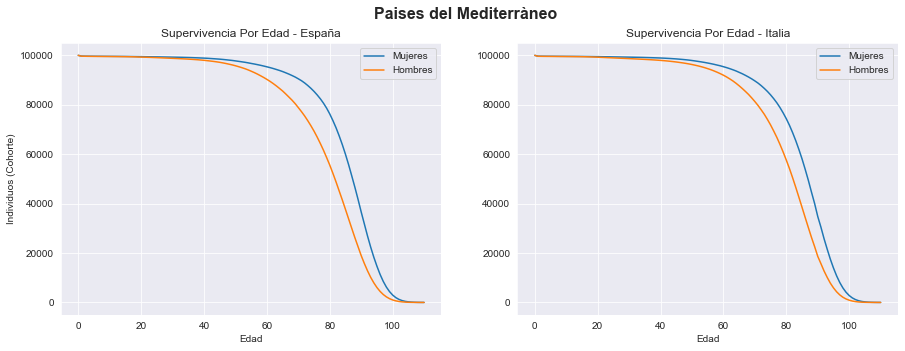

In [9]:
plt.rcParams['figure.figsize'] = [15, 5]
p1 = plt.subplot(1,2,1)
plt.title('Supervivencia Por Edad - España')
plt.xlabel('Edad')
plt.ylabel('Individuos (Cohorte)')
plt.plot(dataset.index, dataset.Spain_Female, label = 'Mujeres')
plt.plot(dataset.index, dataset.Spain_Male, label= 'Hombres')
plt.legend(loc='best')
p2 = plt.subplot(1,2,2)
plt.title('Supervivencia Por Edad - Italia')
plt.xlabel('Edad')
plt.suptitle('Paises del Mediterràneo', fontweight='bold', fontsize=16)
plt.plot(dataset.index, dataset.Italy_Female, label='Mujeres')
plt.plot(dataset.index, dataset.Italy_Male, label='Hombres')
plt.legend(loc='best')
plt.show()

Tomemos el caso de España. Al comienzo de $20^{th}$, la esperanza de vida en este país mediterráneo era en promedio de solo 34.76 años. <br> Para el cambio de siglo **la esperanza de vida al nacer aumentó** rápidamente y desde 1990,
La esperanza de vida al nacer ha aumentado casi cuatro años, llegando a 80,9 en 2007. <br>
**Para obtener información más detallada sobre las Comunidades Autónomas, consulte el enlace del INE**. [Aplaste aquí](https://www.ine.es/en/prensa/np584_en.pdf) <br>
Aunque se ha verificado que en España la esperanza de vida aumentó a una de las tasas más altas del mundo, existe una brecha visible. <br>
De hecho, por sexo, la diferencia en la incidencia de mortalidad se mantuvo. La esperanza de vida al nacer de las mujeres supera <br>la de los hombres en más de seis años. <br>
Si lo comparamos con **Italia** otro país mediterráneo con tasas similares, la brecha de línea es más corta que la española. <br>
Gráficamente, hay una distancia ligeramente más pronunciada entre la línea ocre y la azul en España que en la de Italia.

# Para ver en modo interactivo y mas detallado, clicar en los enlaces siguientes.

In [24]:
# Codigo
#import plotly.graph_objects as go

#pivotes = pd.pivot_table(dataset, values=['Spain_Male', 'Spain_Female'], index=dataset.index)
#males = go.Scatter(x= pivotes.index, y=pivotes.Spain_Male, name= 'Males', mode='lines')
#females = go.Scatter(x=pivotes.index, y=pivotes.Spain_Female, name='Females', mode='lines')

#frames= [males, females]

#figure = go.Figure(frames)
#figure.update_layout(title_text='Survival Plot - Spain', xaxis_title= 'Age', yaxis_title='Individuals' )
#pivita = pd.pivot_table(dataset, values=['Italy_Male', 'Italy_Female'], index=dataset.index)
#malesita = go.Scatter(x= pivotes.index, y=pivita.Italy_Male, name= 'Males', mode='lines')
#femalesita = go.Scatter(x=pivotes.index, y=pivita.Italy_Female, name='Females', mode='lines')

#framesita= [malesita, femalesita]

#figurita = go.Figure(framesita)
#figurita.update_layout(title_text='Survival Plot - Italy', xaxis_title= 'Age', yaxis_title='Individuals' )

#figure.show()


**[España](https://joevalencia.github.io/Life-Actuarial-Stats/Spain.html)<br>
[ITALIA](https://joevalencia.github.io/Life-Actuarial-Stats/Italy.html)<br>
[MEDITERRANEO](https://joevalencia.github.io/Life-Actuarial-Stats/Mediterranea.html)**

En otros términos, esta distancia más marcada significa que, en promedio, una pareja española tiene menos probabilidad de permanecer unida en comparación con una de Italia, si por permanecer unida entendemos que no muera al menos uno de ellos al cabo de $n$ años. <br> En estadística actuarial también se le llama **PROBABILIDAD DE DISOLUCIÓN**. <br>
En otras palabras, en una *póliza de seguro conjunta*, la disolución se refiere a la muerte de la primera persona por la cual la pareja había estado pagando. <br>
De hecho, **el seguro de vida conjunto** es una póliza de seguro que generalmente cubre a dos personas, pero solo paga una vez. <br>Típicamente, este pago será una suma global, que va al sobreviviente después de que la primera persona muere dentro del plazo de una póliza.<br> Cuando finaliza la política, no hay más cobertura de vida para el sobreviviente.

**Calculemos un ejemplo para ver como funciona**

Antes que nada, tenemos que decir que en ciertos productos de seguros, como el seguro de vida para una familia, es necesario estudiar el comportamiento biométrico de grupos compuestos por varios individuos (también llamados cabezas) de diferentes edades. <br>
En estos casos, tenemos que estudiar las probabilidades de *supervivencia* *conjunta* o muerte para todos o parte de los individuos en el grupo. <br>
Dado que aceptamos la **hipótesis de independencia**, tendremos la probabilidad de supervivencia conjunta durante un año de tres cabezas de edades $y$, $x$ y $z$, que simbolizamos con $p_{xyz}$. <br>
$$p_ {xyz} = p_{x} \times p_ {y} \times p_{z}$$

**Recordemos que la disolución de un grupo ocurre cuando al menos fallece una persona del grupo.**

La formula nos sugiere:<br>
* **Probabilidad de disolucion:** $q_{xy}= q_{x} \times p_{y} +q_{y} \times p_{x}+ q_{x}\times q_{y}= 1-p_{xy}$

En python podemos usar la biblioteca [pyliferisk](https://github.com/franciscogarate/pyliferisk). **Pyliferisk** es una biblioteca de python para cálculos actuariales de vida, simple, potente y fácil de usar tanto como la contraparte de R: [lifecontingencies](https://cran.r-project.org/web/packages/lifecontingencies/lifecontingencies.pdf).

In [10]:
import pyliferisk as life
import pyliferisk.mortalitytables as mort

$ NOTA $: pyliferisk multiplica automáticamente * 1000. Por lo tanto, dividimos por 1000 para obtener las probabilidades reales.

Debemos aplicar la fórmula de probabilidad de disolución. <br>
En pyliferisk, digamos que queremos saber la probabilidad de disolución dentro de un año de una pareja de 60 años, por simplicidad. <br> **Aquí el código:**

In [11]:
mortal_tab.iloc[60:61]

,Hombres,Mujeres,dx MuertesM,dx MuertesF,qx Hombres,qy Mujeres,px Hombres,py Mujeres
60,90277,95359,805.0,323.0,0.008917,0.003387,0.991083,0.996613


In [13]:
tab = mortal_tab.iloc[60:61]
tab['qx Hombres']

60    0.008917
Name: qx Hombres, dtype: float64

In [14]:
qxy = tab['qx Hombres']*tab['qy Mujeres']+tab['qx Hombres']*tab['py Mujeres']+tab['px Hombres']*tab['qy Mujeres']
print('La probabilidad es: \n', qxy)

La probabilidad es: 
 60    0.012274
dtype: float64


$Se Note:$ Esto también es como hacer $1-p_{xy}= 1-p_{x}\times p_{y}.$<br>Por lo mismo:

In [15]:
qxy_bis = 1- tab['px Hombres']*tab['py Mujeres']
print('La probabilidad es: \n',qxy_bis)

La probabilidad es: 
 60    0.012274
dtype: float64


### Un ejemplo mas acerca de la comodidad de python...

**Ejemplo. Cálculo del flujo de caja: anualidad - aumento geométrico inmediato** <br>
Renta vitalicia inmediata que aumenta geométricamente para un hombre de 69 años.

In [17]:

age = 69
initial_payment = 10000
incr = 0.03 # increment
i = 0.05    # interest rate

discount_factor = []
for y in range (0 , mortal_males.w - age ):
    discount_factor.append (1 / (1 + i) ** (y + 1) )

payments = [initial_payment]
for x in range (0 , mortal_males.w - age -1):
    payments.append( payments [x] * (1 + incr ) * (1 - mortal_males.qx[age+x] /1000) )

print('Premium :', np.dot(payments, discount_factor).round(2))

Premium : 125830.73


### Esperanza de vida

Cuando una persona decide contratar un seguro de vida, uno de los factores más relevantes para determinar la **prima** de la póliza es la edad actual del asegurado. Las características de la vida futura del asegurado (esperanza, variación, mediana de vida residual) proporcionarán información muy importante a este respecto. Recordamos que la función de distribución de la vida residual $G (x)$ está relacionada con la de la edad de la muerte de la siguiente manera:

#### $$G_{x}(t) = P[T(x) \le t] = \frac{F(x+t)-F(x)}{1-F(x)}$$
[Notacion](#bi)

## Resumiendo
Las estadísticas actuariales de vida, como una rama de la ciencia actuarial, son cada vez más un campo en el que depender ya que la expectativa de vida y otras implicaciones de seguro están relacionadas con ella. <br>
Es màs, debemos recordar que los países desarrollados se enfrentan a envejecimiento y brechas negativas en la tasa de natalidad. <br>
Por otro lado, una externalidad positiva que las investigaciones recientes han hecho está relacionada con la escolarización. <br>De hecho, a medida que la esperanza de vida continúa aumentando a nivel mundial, se muestra como esta también está relacionada con niveles más altos de escolaridad. Casper Worm Hansen ha escrito un [Paper](https://www.sdu.dk/-/media/files/om_sdu/institutter/ivoe/disc_papers/disc_2012/dpbe6_2012.pdf) en cuanto aquello. <br>
**Cerremos con un gráfico interactivo al respecto.** <br>**[Cuadro de escolarización](https://joevalencia.github.io/Life-Actuarial-Stats/Schooling.html)** demuestra cómo la esperanza de vida ha estado creciendo desde el comienzo de $ 21 ^ {th} $. Entonces, **Recomiendo mirarlo**.  <br> Esta trama solo tiene como objetivo recordarnos cuánto podrían confiar los analistas de datos en software técnico para aclarar conceptos.

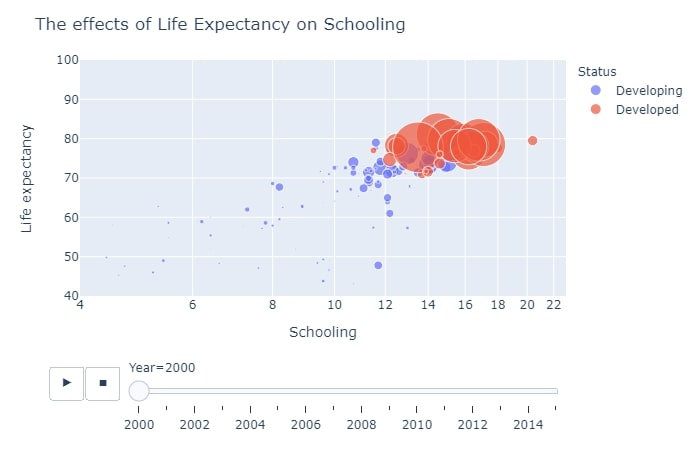

# [Schooling chart](https://joevalencia.github.io/Life-Actuarial-Stats/Schooling.html)

En primer lugar, dado que no es posible mostrar gráficos interactivos en README o Jupiter Notebook en Github, **invito calurosamente** a cliclar el enlace arriba para verlo en modo interactivo. <br>A pesar de este pequeño problema, no es un obstáculo y la visualización ya que es posible una excelente representaciòn con **Plotly**. <br>
Plotly es una poderosa biblioteca interactiva para Python. Es bastante útil ya que podemos deslizarnos en el gráfico para mirar hasta el más mínimo detalle. <br> De hecho, le aconsejo al lector que deslice el dedo hacia arriba y hacia abajo para ver la edad y el número de personas de manera interactiva. <br> El primer gráfico es un **Gráfico de supervivencia**, generalmente se representa como un gráfico de líneas. En el eje y tenemos la cohorte que comienza en 100,000 como se dijo antes. <br> En este gráfico, como de costumbre, se ilustra en el eje $x$ la edad de un grupo de individuos y claramente comienza en 0 llegando al límite edad (nuestro $ \omega $).

Verán que los puntos rojos representan a las economías desarrolladas y las azules como en desarrollo. <br> El tamaño de las bolas o puntos depende del porcentaje de gasto a lo largo de los años. <br> A medida que pasa el tiempo, aumenta el índice de escolaridad y aumenta la esperanza de vida. .

**El último dataset [conjunto de datos](https://www.kaggle.com/kumarajarshi/life-expectancy-who) también fue tomado de kaggle.** <br>
##### Reconocimiento: Los datos se obtuvieron del sitio web de la OMS y las Naciones Unidas con la ayuda de Deeksha Russell y Duan Wang.

#### Aquì en codigo para el grafico interactivo

In [18]:
archivo = r'C:\Users\Josè Valencia\Desktop\Actuarial\lifedata.csv'
lifedata = pd.read_csv(archivo)
lifedata.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [19]:
lifedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [ ]:
lifeworld = lifedata.sort_values('Year', axis=0, ascending=True) # Ordenamos los datos segun el tiempo

In [ ]:
d = px.scatter(data_frame=lifeworld, y='Life expectancy ', x='Schooling', animation_frame='Year', 
               log_x=True, color ='Status', size='percentage expenditure', range_y=[40,100],
               range_x=[4,23], hover_name='Country', animation_group='Country', size_max=55)
d.update_layout(title='The effects of Life Expectancy on Schooling', transition = {'duration': 400})
d.show()

## Referencias 

1. **Estadística actuarial vida** M. Ayuso, H. Corrales, M. Guillén, A.M. Pérez-Marín, J. L. Rojo
2. **Elementos de calculo acuarial** M.A. Parras, J.A. Sanchez Chibràs.